# LEVEL 2

### Task 1: Table Booking and Online Delivery
- Determine the percentage of restaurants that offer table booking and online delivery.
- Compare the average ratings of restaurants with table booking and those without.
- Analyze the availability of online delivery among restaurants with different price ranges.

### Task 2: Price Range Analysis
- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.

### Task: Feature Engineering
- Extract additional features from the existing columns, such as the length of the restaurant name or address.
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task - 1 : Table Booking and Online Delivery

#### Determine the percentage of restaurants that offer table booking and online delivery.

In [7]:
df['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [8]:
df['Has Online delivery'].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [9]:
# Correct Table Booking percentage calculation
print("Table Booking: ", round((1158 / (8393 + 1158)) * 100, 2), "%")

# Correct Online Delivery percentage calculation
print("Online Delivery: ", round((2451 / (7100 + 2451)) * 100, 2), "%")

Table Booking:  12.12 %
Online Delivery:  25.66 %


#### Compare the average ratings of restaurants with table booking and those without.

In [10]:
yes = df[df["Has Table booking"] == 'Yes']
no = df[df["Has Table booking"] == 'No']

print("with table booking: " , yes.shape)
print("without table booking: " , no.shape)

with table booking:  (1158, 21)
without table booking:  (8393, 21)


In [11]:
# Average ratings
print("With table booking: " , round(yes['Aggregate rating'].mean() , 3))
print("Without table booking: " , round(no['Aggregate rating'].mean() , 3))

With table booking:  3.442
Without table booking:  2.559


#### Analyze the availability of online delivery among restaurants with different price ranges.

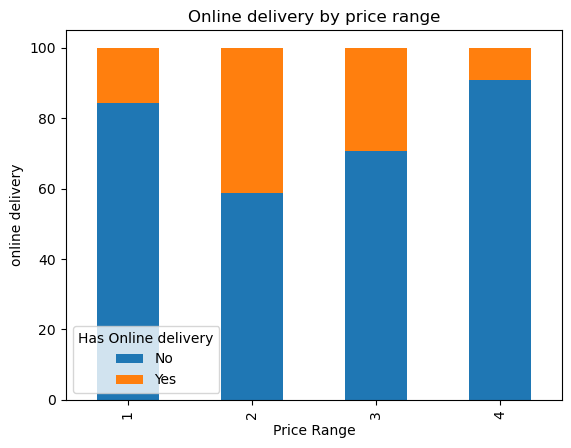

In [12]:
by_price = df.groupby("Price range")['Has Online delivery'].value_counts(normalize=True).unstack()*100
by_price.plot(kind="bar" , stacked=True)
plt.title("Online delivery by price range")
plt.xlabel("Price Range")
plt.ylabel("online delivery")
plt.show()

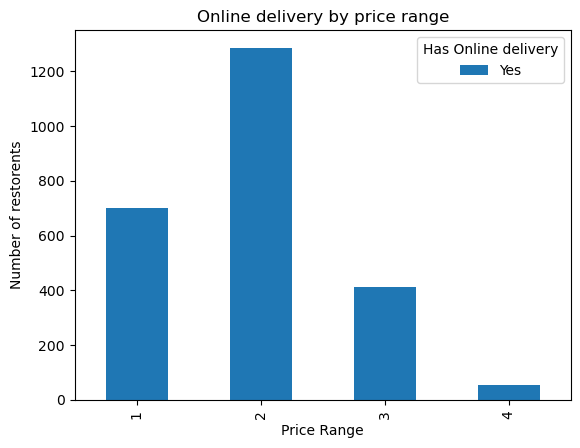

In [13]:
# Only those restorents that have online delivery
online_delivery = df[df["Has Online delivery"] == 'Yes']
count = online_delivery.groupby(['Price range' , "Has Online delivery"]).size().unstack()
count.plot(kind="bar" , stacked=True)
plt.title("Online delivery by price range")
plt.xlabel("Price Range")
plt.ylabel("Number of restorents")
plt.show()

- From these 2 graphs we can see that most restorents don't have online delivery. price range 1 less then 20%. price range 2 40%. price range 3 30% and price range 4 10%
- And from 2nd we analyze that people buy from price range 2. and less people buy from 4. I think because of the price compres to others

## Task - 2 : Price range analysis

Determine the most common price range among all the restaurants.

In [14]:
df['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [15]:
print("The most common price range: " , df['Price range'].mode()[0])

The most common price range:  1


#### Calculate the average rating for each price range. Identify the color that represents the highest average rating among different price ranges.

In [16]:
print("Average rating for each price range: " , df.groupby('Price range')['Aggregate rating'].mean().round(2))

Average rating for each price range:  Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


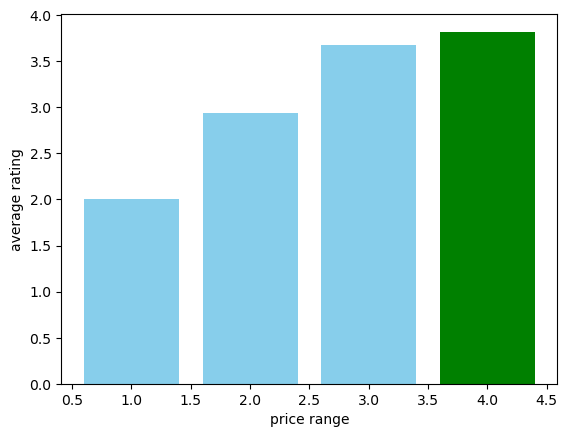

In [17]:
# price range with heighest average rating
a = df.groupby('Price range')['Aggregate rating'].mean().round(2)

avg_color_rating = a.idxmax()
plt.bar(a.index , a , color = "skyblue")
plt.bar(avg_color_rating , a[avg_color_rating] , color='green')
plt.xlabel("price range")
plt.ylabel("average rating")
plt.show()

price range 4 got the heighest rating followed by 3,2 and 1

## Task - 3 : Feature Engineering

#### Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [18]:
# Extract the name and length and create a new column
df['Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

In [19]:
df[['Restaurant Name' , 'Name Length' , 'Address' , 'Address Length']]

,Restaurant Name,Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


#### Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [20]:
df['has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
df[['Has Table booking' , 'has Table Booking' , 'Has Online delivery' , 'Has Online Delivery']]

,Has Table booking,has Table Booking,Has Online delivery,Has Online Delivery
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0
...,...,...,...,...
9546,No,0,No,0
9547,No,0,No,0
9548,No,0,No,0
9549,No,0,No,0


- Two new features are added "name length" from the length of the name and "Address Length" from the length of the address
- Also encoded categorical values by binary with two new features "Has Table Booking" and "Has Online Delivery"

# Observations:
- Restorents having table booking is 12% and restorents having online delivery is 25%
- avg. rating with table booking is 3.44 and without is 2.56
- most of restorents dont have online delivery. In price range 1 less then 20%. price range 2 40%. price range 3 30% and price range 4 10%
- people buy from price range 2. and less people buy from 4. I think because of the price compres to others
- most common price range is 1
- price range 4 get the heighest avg. rating 3.82 followed by price range 3,2,1

In [23]:
# Correct path formatting (use raw string or double backslashes)
path = r"D:\Jupyter Notebook\internship\new_df.csv"  # Raw string (r"...")
# OR
# path = "D:\\Jupyter Notebook\\internship\\data.csv"  # Double backslashes

# Save DataFrame to CSV
df.to_csv(path, index=False)

# Correct formatted print statement
print(f"Successfully saved to {path}")  # f-string

Successfully saved to D:\Jupyter Notebook\internship\new_df.csv
